Part I
---


| Var | (a, sigma^2) | n | q | k | Rule | Law |
| --- | --- | --- | --- | --- | --- | --- |
| 5 | (0;9) | 60 | 1.75 | 3 | Стерджеса | Треугольное на отрезке (-2, 4) и модой, равной 1 |


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import pandas as pd
import math
import statistics

# consts
n = 6000
a = 0
sigma = 3
q = 1.75

left = -2
right = 4
mode = 1

my_c = (mode - left)/(right-left)
my_loc = left
my_scale = right-left

Task 1


In [114]:
sample = sts.norm.rvs(loc=a, scale=sigma, size=n)
print(sample)

[-2.91158738  2.30872413 -0.80317429 ...  3.06413645  1.92729936
 -5.93752207]


In [115]:
n_intervals = int(1 + 3.32*math.log10(n))+1
min_smpl = sample.min()
max_smpl = sample.max()
h = (max_smpl-min_smpl)/n_intervals

print(f"Количество интервалов: {n_intervals}\nДлина интервала: {h}\nМаксимальный: {max_smpl}\nМинимальный элемент: {min_smpl} ")

Количество интервалов: 14
Длина интервала: 1.5375859564798116
Максимальный: 9.943170129366079
Минимальный элемент: -11.583033261351282 


In [116]:
intervals = []
for i in range(0, n_intervals):
    print(f'{i+1} interval: {min_smpl+i*h} - {min_smpl+(i+1)*h}')
    intervals.append(min_smpl+i*h)
intervals.append(min_smpl+n_intervals*h)

1 interval: -11.583033261351282 - -10.045447304871471
2 interval: -10.045447304871471 - -8.507861348391659
3 interval: -8.507861348391659 - -6.970275391911848
4 interval: -6.970275391911848 - -5.432689435432036
5 interval: -5.432689435432036 - -3.8951034789522243
6 interval: -3.8951034789522243 - -2.3575175224724134
7 interval: -2.3575175224724134 - -0.8199315659926008
8 interval: -0.8199315659926008 - 0.7176543904872101
9 interval: 0.7176543904872101 - 2.255240346967021
10 interval: 2.255240346967021 - 3.7928263034468337
11 interval: 3.7928263034468337 - 5.330412259926646
12 interval: 5.330412259926646 - 6.8679982164064555
13 interval: 6.8679982164064555 - 8.405584172886268
14 interval: 8.405584172886268 - 9.94317012936608


In [117]:
frequency = []
arraySort = list(sample)
arraySort.sort()
for i in range(0, len(intervals)-1):
    frequency.append(0)
    for j in arraySort:
        if j >= intervals[i] and j <= intervals[i+1]:
            frequency[i] += 1
for i in range(0, len(frequency)):
    print(f'{i+1} interval: {frequency[i]}')
frequency = np.array(frequency)

print(f'\nСумма частот - {(frequency/n).sum()}')



1 interval: 2
2 interval: 14
3 interval: 49
4 interval: 156
5 interval: 342
6 interval: 696
7 interval: 1074
8 interval: 1233
9 interval: 1047
10 interval: 779
11 interval: 391
12 interval: 154
13 interval: 49
14 interval: 14

Сумма частот - 1.0


14
[-11.58303326 -10.0454473   -8.50786135  -6.97027539  -5.43268944
  -3.89510348  -2.35751752  -0.81993157   0.71765439   2.25524035
   3.7928263    5.33041226   6.86799822   8.40558417   9.94317013]
14
[-11.583033261351282, -10.045447304871471, -8.507861348391659, -6.970275391911848, -5.432689435432036, -3.8951034789522243, -2.3575175224724134, -0.8199315659926008, 0.7176543904872101, 2.255240346967021, 3.7928263034468337, 5.330412259926646, 6.8679982164064555, 8.405584172886268, 9.94317012936608]


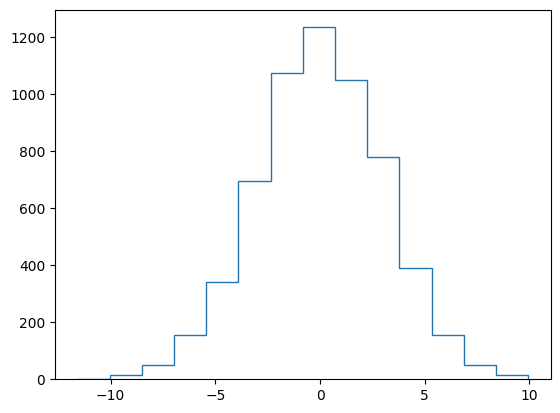

In [118]:
counts, bins = np.histogram(sample, bins='sturges')
plt.stairs(counts, bins)
print(len(counts))
print(bins)

print((len(frequency)))
print(intervals)

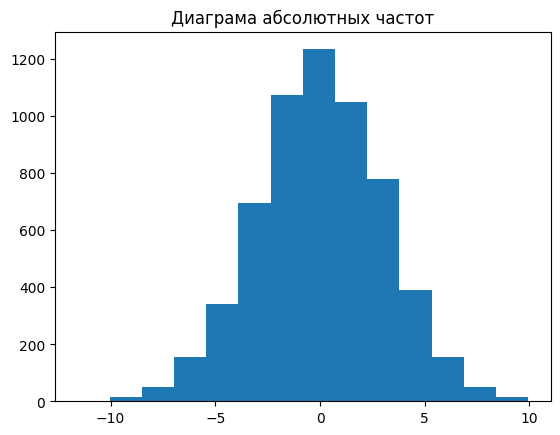

In [119]:
plt.title("Диаграма абсолютных частот")
plt.stairs(frequency, intervals, fill=True)

In [120]:
my_pdf = frequency/(h*n)
for i in range(0, len(my_pdf)):
    print(f'{i+1} interval: {my_pdf[i]}')
# print(f'Сумма абсолютных частот {tmp.sum()}')

1 interval: 0.00021679004801557577
2 interval: 0.0015175303361090306
3 interval: 0.005311356176381607
4 interval: 0.016909623745214913
5 interval: 0.03707109821066346
6 interval: 0.07544293670942037
7 interval: 0.1164162557843642
8 interval: 0.13365106460160248
9 interval: 0.11348959013615392
10 interval: 0.08443972370206677
11 interval: 0.04238245438704506
12 interval: 0.016692833697199337
13 interval: 0.005311356176381607
14 interval: 0.0015175303361090306


[0.00021679 0.00151753 0.00531136 0.01690962 0.0370711  0.07544294
 0.11641626 0.13365106 0.11348959 0.08443972 0.04238245 0.01669283
 0.00531136 0.00151753]
0.6503701440467272


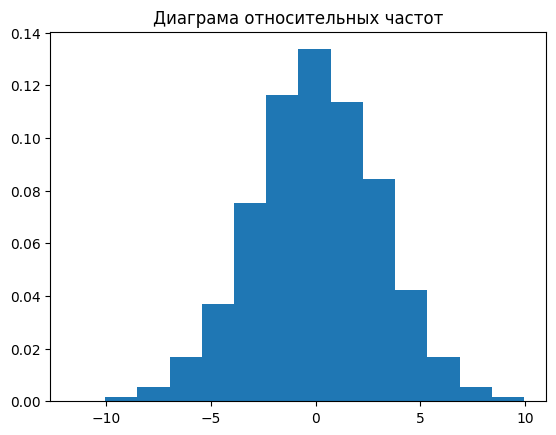

In [121]:
plt.title("Диаграма относительных частот")
plt.stairs(my_pdf, intervals, fill=True)
print(my_pdf)
print(my_pdf.sum())

Task 2

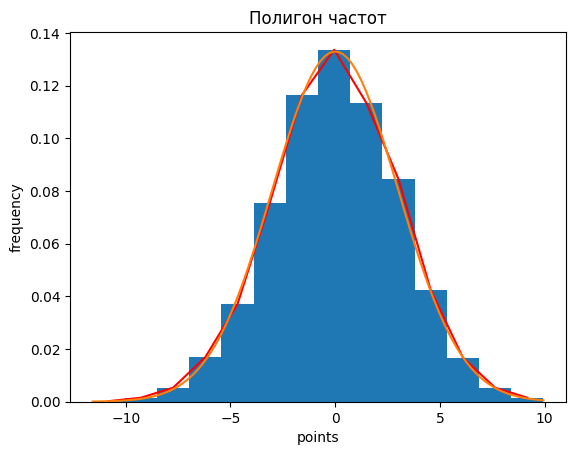

In [122]:
lineY = []
for i in my_pdf:
    lineY.append(i)
lineX = []
for i in range(0, len(intervals)-1):
    lineX.append(intervals[i]+h/2)
plt.stairs(my_pdf, intervals, fill=True)
plt.plot(lineX, lineY, color="red")

x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.pdf(x, a, sigma))

plt.title('Полигон частот')
plt.xlabel('points')
plt.ylabel('frequency')
plt.show()

In [123]:
# check
proof = 0 
for i in frequency/n/h:
    proof+=i*h
print("Сумма площадей под графиком: ", proof)


Сумма площадей под графиком:  0.9999999999999999


Function graph

In [124]:
arrayGraph = []
tmp1= frequency/n
for i in range(0, len(tmp1)):
    arrayGraph.append(0)
    for j in range (0, i):
        arrayGraph[i]+=tmp1[j]
cdfY = []
for i in arrayGraph:
    cdfY.append(i)
cdfY.append(1)
cdfX = []
for i in intervals:
    cdfX.append(i)


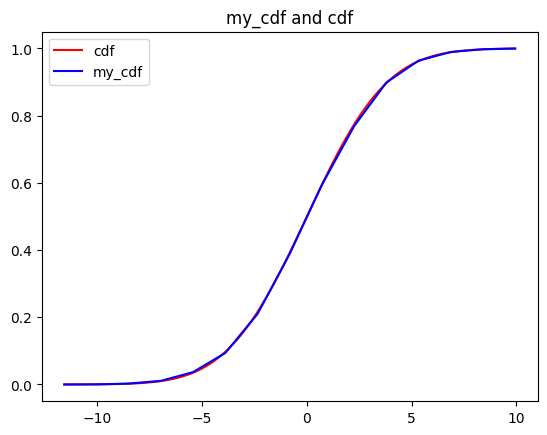

In [125]:
# fig, ax = plt.subplots()
# for i in range(0, len(arrayGraph)):
#     ax.hlines(y=arrayGraph[i], xmin=intervals[i], xmax=intervals[i+1], linewidth=2, color='r')
    
# ax.hlines(y=1, xmin=intervals[len(intervals)-1], xmax=intervals[len(intervals)-1]+10, linewidth=2, color='r')
# ax.hlines(y=0, xmin=intervals[0]-10, xmax=intervals[0], linewidth=2, color='r')
# plt.plot(x, sts.norm.cdf(x, a, sigma))
# ---------------------------------------------------


x = np.linspace(min_smpl, max_smpl, 100)
plt.plot(x, sts.norm.cdf(x, a, sigma), color="red")

plt.plot(cdfX, cdfY, color="blue")
plt.legend(['cdf', 'my_cdf'])
plt.title("my_cdf and cdf")
plt.show()

,X
0.25,-1.966431
0.50,0.004733
0.75,2.071553


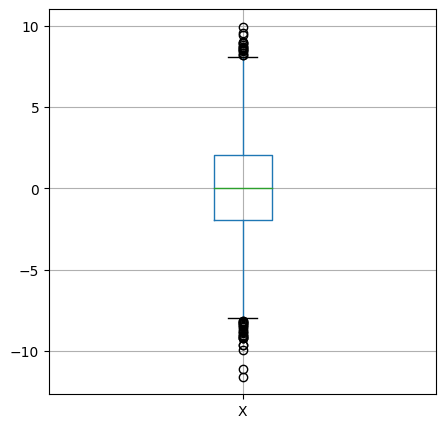

In [126]:
df = pd.DataFrame(data=sample,columns=['X'])
df.boxplot(figsize = (5, 5))
df.quantile([0.25,0.5,0.75])

part 3


In [127]:
print(q)
print(f"Вероятность по таблице {0.4599*2}")
print(f"Вероятность по lib {sts.norm().cdf(q)-sts.norm().cdf(-q)}")

prob = 0
for i in sample:
    if i>mode -(q*sigma) and i<mode +(q*sigma):
        prob+=1
prob/=n
print(f"Статистическая {prob}")


1.75
Вероятность по таблице 0.9198
Вероятность по lib 0.9198816862723658
Статистическая 0.9058333333333334


part 4

In [128]:
tem1 = frequency/n
sample 

my_mean = statistics.mean(sample)
my_variacne = statistics.variance(sample)
my_dev = math.sqrt(my_variacne)
my_skewness = sts.skew(sample)
my_kurtosis = sts.kurtosis(sample)
print(f'mean - {my_mean}, \nvariacne - {my_variacne}, \ndev - {my_dev}, \nSkewness - {my_skewness}, \nKurtosis - {my_kurtosis}')


mean - 0.015301353716317684, 
variacne - 8.948805040806976, 
dev - 2.9914553382604554, 
Skewness - -0.04680756429312137, 
Kurtosis - 0.005511764914812645


In [129]:
X = sample.sum()/len(sample)
print(f'Первый эмпирический момент: {X}')
s2 = 0
for i in sample:
    s2 += (i-X)**2
s2 = s2/len(sample)
print(f'Эмпирическая дисперсия: {s2}')
print(f'Стандартное отклонение: {math.sqrt(s2)}')
print(f'S^2: {(s2)*len(sample)/(len(sample)-1)}')

x4 = 0
s3 = 0
s4 = 0
for i in sample:
    x4 += math.pow(i, 4)
    s3 += math.pow((i-X), 3)
    s4 += math.pow((i-X), 4)
x4 /= len(sample)
s3 /= len(sample)
s4 /= len(sample)
print(f'Коэффициент ассимметрии: {s3/math.pow(math.sqrt(s2), 3)}')
print(f'Коэффициент эксцесса: {s4/math.pow(s2, 2)-3}')

Первый эмпирический момент: 0.015301353716317684
Эмпирическая дисперсия: 8.947313573300148
Стандартное отклонение: 2.9912060399277327
S^2: 8.948805040806949
Коэффициент ассимметрии: -0.04680756429312165
Коэффициент эксцесса: 0.005511764914831296
